# II) Linear system

In [1]:
from ngsolve import *
from ngsolve.webgui import Draw

In [ ]:
from utils.myGeometries import square
Omega = square(maxh=0.2)        # generates the domain 
u0 = (x-0.5)**2 + (y-0.5)**2    # define the function

## 1) Variational formulation
### a) Stationarity 
Actually, one can solve the least-square problem in one step. Since it is a **convex unconstrained minimization problem**, it is enough to write the **optimality condition**, i.e, the derivative cancellation of $J$ (Newton method) :
$$ \forall v\in H, \quad  J'(u;v) = 0$$
$$ \Rightarrow \forall v\in H,  \quad \int_\Omega (u-u_0) v = 0 $$
$$ \Rightarrow \forall v\in H,  \quad \underbrace{\int_\Omega u v}_{A(u,v)} = \underbrace{\int_\Omega u_0 v}_{l(v)} $$

- The arbitrary direction $v$ is called a **test function**
- The left-hand side $A(u,v)$ is a bilinear form
- The right hand side $l(v)$ is a linear form

### b) Weak form

- The last line is called a **variational formulation**; also the **weak form** of the following "**strong**" equation, obtained by removing the integrals and :
$$ u = u_0  $$
- The variational form is called **weak** because $u$ might not be exactly equal to $u_0$, it is only the *best possible* in the admissible space $H$.
- $u_0$ is always solution of the weak form, but the converse is not be true.

We can write variational formulation in NGSolve. For instance,

$$ \int_\Omega \nabla u  \cdot \nabla v  \; dx$$

can be written as `grad(u) * grad(v) * dx` in NGSolve. To integrate over a specific region `name_region`, one can use `grad(u) * grad(v) * dx("name_region")`.

In [ ]:
# first, define the function space
function_space = H1(Omega)
u = function_space.TrialFunction()
v = function_space.TestFunction()

bf = BilinearForm( ......... ) # To fill
lf = LinearForm( ......... )   # To fill

### Theoretical parenthesis

We want to be able to converge to the **correct solution**, which is the case if $H$ is **well chosen**, and if the problem is **well-posed**.

There are some theorems to check if a problem is well-posed. For instance :

**Lax-Milgram**

1. $H$ is a Hilbert space with a scalar product $\langle \cdot , \cdot  \rangle$ and associated norm $||\cdot ||$
2. $A$ is a bilinear form that is
- **continuous** : $\exists c_a >0, \forall (u,v) \in H^2, \quad |A(u,v)| \leq c_a ||u||\,||v||$ 
- **elliptic** :  $\exists \alpha >0, \forall u \in H, \quad A(u,u) \geq \alpha ||u||^2$
3. $l$ is a continuous linear form : $\exists c_l >0, \forall v \in S, \quad |l(v)| \leq c_l ||v||$ 

Then, the problem is well posed (unique and stable solution):
- $$ \exists ! u \in H, \forall v \in H,\quad A(u,v) = l(v) $$

Moreover:
- $$ ||u|| \leq \frac{c_l}{\alpha} $$

And additionaly, if $A$ is symmetric, $u$ is the solution of the following minimization problem
$$ u = \arg \min_{u\in S} \frac{1}{2} A(u,u) - l(u) $$
**Proof of this point** : exercise

**Note** : Lax-Milgram hypothesis are sufficient but not necessary. It can be extended to non-linear problems, requiring $A$ to be stricly monotone (Zarantonello). Also, $A$ does not have to be coercive ; a more general condition is the **inf-sup condition** (Ladyzhenskaya–Babuška–Brezzi).

______
## 2) Discretization and assembly

Once discretized on a mesh and suitable function space with DoF indexed by $i$, we formally have:

- Bilinear form is equivalent to a matrix : $K_{ij} = A(u_j, v_i) $
- Linear form is equivalent to a vector $f_i = l(v_i)$

with $u_i, v_j$ the unitary function associated to DoF $i,j$, repsectively. Then, after discretization, one has to solve the matrix system :

$$ K_{ij} u_{j} = f_{i} $$

We'll see in the next class how the assembly process works in more details (not so simple!). What we have to remember from now is that this process is about computing elementary integrals.
Right now, we just use the capabilities of NGSolve.

In [4]:
bf.Assemble()
lf.Assemble()

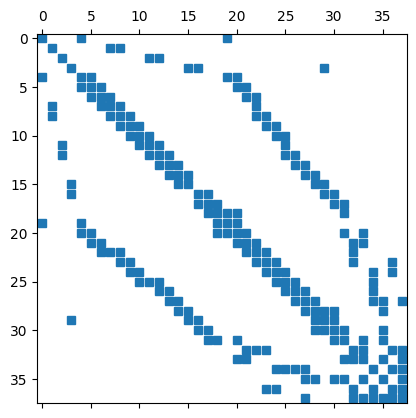

In [5]:
rows,cols,vals = bf.mat.COO()
import scipy.sparse as sp
K = sp.csr_matrix((vals,(rows,cols)))
import matplotlib.pylab as plt
plt.spy(K,markersize = 6); plt.show() # plot non-zero terms of the matrix

_____
## Exercise
1. Why is the matrix so **sparse**?
2. Observe the **sparsity patterns** of the assembled bilinear form with continuous and discontinuous function spaces (`H1` and `L2`).
3. **Bonus** : Explain the difference of sparsity pattern.

______
## 3) Solving the problem

Solving the mean-square problem is now equivalent to solving this unique matrix system, without the need to iterate.
The matrix is symmetric positive definite, so we can use **Cholesky factorization** (a lot more memory efficient than computing explicitely the inverse).

In [6]:
sol = GridFunction(function_space)
sol.vec.data = bf.mat.Inverse(inverse = "sparsecholesky") * lf.vec
Draw(sol,  settings = {"deformation" :  0.5})

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'deformation': 0.5}, 'ngsolve…

BaseWebGuiScene